# Quick Check for Setup

In [102]:
import tensorflow as tf
import os
print("If this cell fails please check your Open OnDemand Setup", 
      "Make sure you requested enough resources and the correct enviroment")

assert(tf.__version__=="2.6.0")
assert(int(os.environ["SLURM_MEM_PER_NODE"]) > 8000 )
assert(int(os.environ["SLURM_CPUS_ON_NODE"]) >= 2 )

print('Your setup looks good!')


If this cell fails please check your Open OnDemand Setup Make sure you requested enough resources and the correct enviroment
Your setup looks good!


# Quick Programming Powerup

Numpy arrays have a large number of useful ways to access data, we'll talk about two in this powerup!

## Masking
A handy way to select elements in NumPy is masking:

* This lets you easily do things like Select X's for example where Y=True


In [1]:
import numpy as np

#Here is some fake data
Xs=np.random.uniform(size=(20))
Ys=np.random.uniform(size=(20)) > .8 #80% of our Ys should be true

print(Xs)
print(Ys)

# Here we'll use as mask to grab all True Xs
mask=(Ys==1)

print(mask)

print(Xs[mask])
#Or since Ys are true or false 
print(Xs[Ys])



[0.73197819 0.83890539 0.63884828 0.76779859 0.49577867 0.90588706
 0.17365439 0.44154242 0.13070658 0.86259261 0.12487312 0.45653655
 0.48307884 0.64960542 0.75713842 0.8744478  0.16848681 0.16832231
 0.94333723 0.72069869]
[False  True False False  True False False False False False False False
  True False False False False  True  True False]
[False  True False False  True False False False False False False False
  True False False False False  True  True False]
[0.83890539 0.49577867 0.48307884 0.16832231 0.94333723]
[0.83890539 0.49577867 0.48307884 0.16832231 0.94333723]


## Using Lists as Indices
A handy way to select elements in NumPy is using lists:

* This lets you easily do things like Select The 3 Biggest Elements in X 

In [2]:
#Some other Handy Tricks

Xs=np.random.uniform(size=(5)) #Input Data
Ys=np.random.uniform(size=(5)) >.5 #Target Data

print("Xs",Xs)
print("Ys",Xs)

#Lists for index's work too

print("Selected Xs",Xs[[1,2,4]])

#This can be useful if you want to grab the labels for smallest values of x

#This gives you index's of an array in a list
sort_i=np.argsort(Xs)
print('Sorted Xs',Xs[sort_i])
print('Largest 3 Xs', Xs[sort_i[-3:]])

biggest_index=sort_i[-1]
smallest_index=sort_i[0]

print('Label for Largest X ',Ys[biggest_index])
print('Label for Smallest X ',Ys[smallest_index])

print('The Same X 4 Times ',Xs[[1,1,1,1]])






Xs [0.16723432 0.2086834  0.14284738 0.63857108 0.23185922]
Ys [0.16723432 0.2086834  0.14284738 0.63857108 0.23185922]
Selected Xs [0.2086834  0.14284738 0.23185922]
Sorted Xs [0.14284738 0.16723432 0.2086834  0.23185922 0.63857108]
Largest 3 Xs [0.2086834  0.23185922 0.63857108]
Label for Largest X  True
Label for Smallest X  True
The Same X 4 Times  [0.2086834 0.2086834 0.2086834 0.2086834]


In [3]:
Xs=np.random.uniform(size=(100)) #Input Data
"try to print the 5th,6th, and 8th, largest element in the Xs above in two lines of code"
sort_i=np.argsort(Xs)
print(Xs[sort_i[[-5,-6,-8]]])

[0.92961624 0.92524559 0.90497025]


# Images with Neural Networks

This notebook makes extensive use of examples and figures from [here](http://cs231n.github.io/convolutional-networks/), which is a great reference for further details.


# GOALS

* Understand how Image data is stored and used
* Write a Multi-Class classification model
* Be able to use convolutional layers
* Build a network for Image Classification
* Understand Over-fitting and some ways to deal with it

# Example: MNIST - Fashion

For this example we'll use MNIST- Fashion, a collection of small 28x28 pixel images of various pieces of clothing. It is a common benchmark along with with the original MNIST which is a collection of hand written digits. We will load the data directly from keras.



## The Task
This is a multi-class classification problem, identify the type of object in the image

|Label| Class  |
|------ | ------|
|    0|T-shirt/top|
|    1|Trouser|
|    2| Pullover|
|    3| Dress|
|    4| Coat|
|    5| Sandal|
|    6| Shirt|
|    7| Sneaker|
|    8| Bag|
|    9| Ankle boot|
 



## Image Data 

Here we'll rely on tensorflow and the handy package Keras that comes with it

In [4]:
import os
import os.path
import numpy as np
from matplotlib import pyplot as plt
from random import random
from sys import version
print("Import complete")   

Import complete


A Single Image:
 [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0   0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62  54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134 144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178 107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216 216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 2

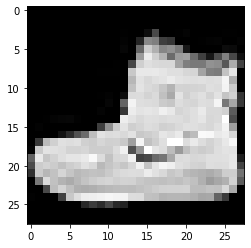

Example Label: 9


In [5]:
# Load pre-shuffled MNIST data into train and test sets
(_xtrain, _ytrain), (X_test, Y_test) = tf.keras.datasets.fashion_mnist.load_data()

#We want to include a develop set so let's split the training set
train_index=[]
develop_index=[]
for i in range(len(_xtrain)):
    if random() <0.8:
        train_index.append(i)
    else:
        develop_index.append(i)
X_train=_xtrain[train_index]
Y_train=_ytrain[train_index]

X_develop=_xtrain[develop_index]
Y_develop=_ytrain[develop_index]


np.set_printoptions(linewidth=115)
n_targets=np.max(Y_test)+1
print('A Single Image:\n',X_train[0])
plt.imshow(X_train[0],cmap='gray')
plt.show()
print('Example Label:', Y_train[0])

* Note above that the labels are integers from 0-9
* Also note the images are integers from 0-255 (uint8)

We will deal with the labels first. Lets make some useful arrays and dictionaries to keep track of what each integer means 

In [6]:
# This is useful for making plots it takes an integer
lookup_dict={
    0 :'T-shirt/top',
    1 :'Trouser',
    2 :'Pullover',
    3 :'Dress',
    4 :'Coat',
    5 :'Sandal',
    6 :'Shirt',
    7 :'Sneaker',
    8 :'Bag',
    9 :'Ankle boot' 
}


#Lets make a list in the order of the labels above so [T-Shirt,Trouser,...]
labels=list(lookup_dict.values())

#Check to make sure labels list is in the right order (not guaranteed in python < 3.6)
if not all([v==lookup_dict[i] for i,v in enumerate(labels) ]):
    print('This looks like an old version of python making labels the long way, you are using python version', version)
    labels=['' for i in range(n_targets) ] #make a list with the right size
    for key in lookup_dict:
        labels[key]=lookup_dict[key] #Assign list to the vaules
        
#Always good to make simple checks that what you think is going to work actually is working
#Here we check that our array of labels is in the same order as the dictionary we wrote above
assert(all([v==lookup_dict[i] for i,v in enumerate(labels) ]))
print("Array and dictionary are in same order")    

#Another Simple Check (Keras is well tested this will work, but it's good to get in the habit when using your own data)
assert(len(X_train)==len(Y_train))
print("X_train and Y_train are the same length") 
assert(len(X_develop)==len(Y_develop))
print("X_develop and Y_develop are the same length")   
assert(len(X_test)==len(Y_test))
print("X_test and Y_test are the same length")  

Array and dictionary are in same order
X_train and Y_train are the same length
X_develop and Y_develop are the same length
X_test and Y_test are the same length


# Multi-Class Classification

**Reminder**
   * Classification is problem where each of our examples (x) belongs to a class (y). Since Neural networks are universal function approximators, we can use $P(y|x)$

**Like before to change our problem we need**
* The correct activation on our last layer - **softmax**
* The correct loss function - **categorical_crossentropy**

We have more than two classes (0,1,2...) and we need to predict the probability of all of them. However, we have a constraint that all the probabilities must sum to one.

**Our network**
 * Inputs are our images
 * Output is a Dense layer with dimension equal to the number of classes
     * Each output represents $\{P(y=0|x),(y=1|x),(y=2|x)\ ...\}$.
 * We require $\sum_i P(y=i|x) = 1$.

* To enforce this we use a different activation function: a **softmax**

    * $\sigma(x)_i= \frac{e^{x_i}}{\sum_i e^{x_i}}$
    
* Our loss function becomes

 $L=-\frac{1}{N}\sum_i \sum_n y_{true,i,n}*ln(y_{pred,i,n})$

* What this means
    * $y_{true,i,n}$ is a vector with a 1 in the dimention that example belongs to and a zero everywhere else
        *  i.e. Ankle boot = class 9 = (0,0,0,0,0,0,0,0,0,1)
    * The sum in this loss term  $\sum_n y_{true,i,n}*ln(y_{pred,i,n})$
        * is zero except for the one value when n=class of $y_{true}$
        * Then it's just $ln(y_{pred,i,n})$
        * This is same as binary classfication: make -1*$ln(y_{pred,i,n})$ as small as possible




Our input data set has labels stored as integers, but the labels we need for our loss function need to be  **one-hot** encoded

**one-hot** - A vector of zeros except for one entry with a 1 that represents the class of an object
   * i.e. Ankle boot = class 9 = (0,0,0,0,0,0,0,0,0,1)

keras has a utility to convert integers like this easily.

In [7]:
Y_train_one_hot = tf.keras.utils.to_categorical(Y_train, 10)
Y_develop_one_hot =  tf.keras.utils.to_categorical(Y_develop, 10)
Y_test_one_hot =  tf.keras.utils.to_categorical(Y_test, 10)

print('Example:',Y_train[0],'=',Y_train_one_hot[0])

Example: 9 = [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


Now lets handle the image data
* Our Convolutional Neural Networks need a shape of Batch x Height x Width x Channels, for us (batch_size x 28 x 28 x 1)
* In this case channels=1, but for a color image you'll have 3 RGB and sometimes 4 with a transparency channel RGBA 
* It's much easier for a neural network to handle data with range from 0-1, rather than 0-255, so we will scale the data

Datatype: uint8 
Max value: 255


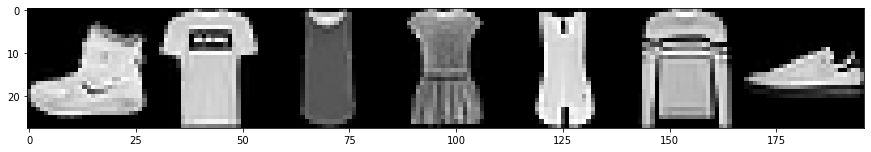

In [8]:

f=plt.figure(figsize=(15,3))
plt.imshow(np.squeeze(np.hstack(X_train[0:7])),cmap='gray') #hstack aranges the first 7 images into one long image

#Reshape
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)
X_develop = X_develop.reshape(X_develop.shape[0], 28, 28, 1)


print("Datatype:",X_train.dtype, "\nMax value:", X_train.max())

Notice that the pixel values imported as an integer array that saturates at `255`.  Let's turn the data into floats $\in [0, 1]$.

In [9]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

if X_train.max()>1:  
    X_train = X_train/255
    X_test = X_test/255
    X_develop = X_develop/255

assert(np.max(X_train) <=1)
assert(np.max(X_test) <=1)
assert(np.max(X_develop) <=1)
print("all sets scaled to float values between", X_train.min(), "and", X_train.max())


all sets scaled to float values between 0.0 and 1.0


# The Take Away

* Image data is 3 dimensional (width,height,channel (i.e color) )
    * It is often stored from 0-255 and should be normalized between 0-1
* Class labels are given as integers and need to be converted to **one hot** vectors
    
* Multi-classification problems 
    * Use **softmax** as an output
    * Use **Categorical Cross Entropy** as a loss function


# Dense Network for Image Classification

* We can use everything we learned in Lesson 2 for Image classification
* But we need one extra layer
    * Dense Layers take 1-D data not 3-D data
    * Convert the two by Flattening
    * tf.keras.layers.Flatten()
    
All this does is reshape the input data

$\begin{pmatrix}a & b \\c & d\end{pmatrix} \rightarrow (a,b,c,d)$

Let's try the network below 


In [10]:
input_layer=tf.keras.layers.Input( shape=X_train.shape[1:] ) # Shape here does not include the batch size 

## Here is our magic layer to turn image data into something a dense layer can use
flat_input=tf.keras.layers.Flatten()(input_layer )#Dense layers take a shape of ( batch x features)
##
hidden_layer1=tf.keras.layers.Dense(100)(flat_input)    
hidden_layer_activation=tf.keras.layers.LeakyReLU()(hidden_layer1)
hidden_layer2=tf.keras.layers.Dense(100)(hidden_layer_activation)
hidden_layer_activation=tf.keras.layers.LeakyReLU()(hidden_layer2)
output_layer=tf.keras.layers.Dense(n_targets,activation='softmax')(hidden_layer_activation)
dense_model=tf.keras.models.Model(input_layer,output_layer)

dense_model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

dense_model.summary()

history=dense_model.fit(X_train, Y_train_one_hot, 
          batch_size=32, epochs=10, verbose=1,
         validation_data=(X_develop,Y_develop_one_hot)
         )


2022-02-03 08:45:56.053586: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2022-02-03 08:45:56.053632: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (n225): /proc/driver/nvidia/version does not exist
2022-02-03 08:45:56.054537: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 100)               78500     
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 100)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               10100     
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 100)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010  

2022-02-03 08:45:59.976282: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/10
1501/1501 [==============================] - 3s 1ms/step - loss: 0.5156 - accuracy: 0.8155 - val_loss: 0.4299 - val_accuracy: 0.8446
Epoch 2/10
1501/1501 [==============================] - 2s 1ms/step - loss: 0.3930 - accuracy: 0.8587 - val_loss: 0.4028 - val_accuracy: 0.8553
Epoch 3/10
1501/1501 [==============================] - 2s 1ms/step - loss: 0.3608 - accuracy: 0.8671 - val_loss: 0.4067 - val_accuracy: 0.8531
Epoch 4/10
1501/1501 [==============================] - 2s 1ms/step - loss: 0.3353 - accuracy: 0.8761 - val_loss: 0.3725 - val_accuracy: 0.8692
Epoch 5/10
1501/1501 [==============================] - 2s 1ms/step - loss: 0.3216 - accuracy: 0.8816 - val_loss: 0.3529 - val_accuracy: 0.8746
Epoch 6/10
1501/1501 [==============================] - 2s 1ms/step - loss: 0.3059 - accuracy: 0.8880 - val_loss: 0.3469 - val_accuracy: 0.8761
Epoch 7/10
1501/1501 [==============================] - 2s 1ms/step - loss: 0.2923 - accuracy: 0.8925 - val_loss: 0.3775 - val_accuracy:

## Loss Curves

The keras fit function returns a history object, that we've ignored until now, but it's a very important tool.
It records the loss of the training and development datasets at each epoch, as well as metrics like accuracy.
Let's plot the loss.

**Most imporantly**
* Is the development loss greater than the train loss?
    * If so your model is overfit and will give worse performance



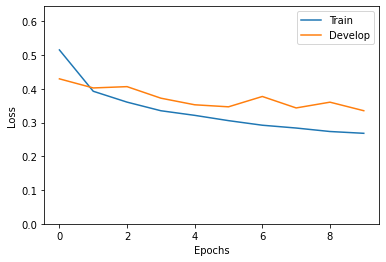

In [11]:
#We'll do this a lot so let's put it in a function
def plot_history(history):     
    plt.plot(history.history['loss'],label='Train')
    plt.plot(history.history['val_loss'],label='Develop')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.ylim((0,1.5*np.max(history.history['val_loss'])))
    plt.legend()
    plt.show()
plot_history(history)

There are many techniques to deal with over-fitting and we'll talk more about them latter, but the easiest way is to just stop the training earlier. You can do this with


```keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=0, verbose=0, mode='auto', baseline=None, restore_best_weights=False)```

This is a callback, or a function that can be used to control the fitting process. It's called at the end of every epoch, or even the end of every batch. We can use these functions by adding them to the fit functions with


```model.fit(...,
  callbacks=[func1,func2])```
  


Epoch 1/10
1501/1501 [==============================] - 2s 1ms/step - loss: 0.2569 - accuracy: 0.9042 - val_loss: 0.3610 - val_accuracy: 0.8707


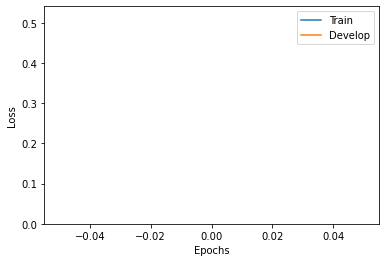

In [12]:
es=tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=0, verbose=0, mode='auto')
history=dense_model.fit(X_train, Y_train_one_hot, 
          batch_size=32, epochs=10, verbose=1,
         validation_data=(X_develop,Y_develop_one_hot),
          callbacks=[es] 
                       )

plot_history(history)

Since we picked up training where we left off the early stopping function quits training as soon as the develop loss stops going down.

# Excerise

With that let's practice writing our own Dense network image classifier
We will a new dataset as an example cifar10


labels=https://www.cs.toronto.edu/~kriz/cifar.html


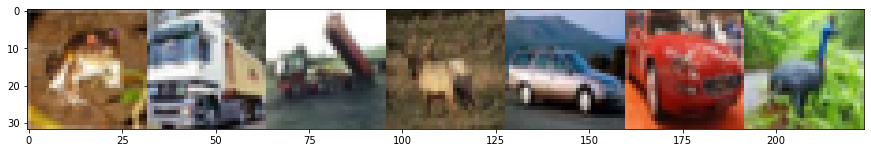

In [13]:
# Load CIFAR data into train and test sets
(_cfxtrain, _cfytrain), (cfX_test, cfY_test) = tf.keras.datasets.cifar10.load_data()

#Split into Train and Develop

train_index=[]
develop_index=[]
for i in range(len(_cfxtrain)):
    if random() <0.8:
        train_index.append(i)
    else:
        develop_index.append(i)
cfX_train=_cfxtrain[train_index]
cfY_train=_cfytrain[train_index]

cfX_develop=_cfxtrain[develop_index]
cfY_develop=_cfytrain[develop_index]

f=plt.figure(figsize=(15,3))
plt.imshow(np.hstack(cfX_train[0:7])) #hstack aranges the first 7 images into one long image



# Step 1 Scale your data to be between 0 and 1

In [14]:
"Your code here normalize cfX_train/test/develop"
cfX_train=cfX_train/255
cfX_develop=cfX_develop/255.
cfX_test=cfX_test/255.

In [15]:
for data_set in [cfX_train,cfX_develop,cfX_test]:
    assert np.max(data_set)==1., 'Max of your data set is '+str(np.max(data_set))+' not 1'
    assert np.min(data_set)==0., 'Max of your data set is '+str(np.min(data_set))+' not 0'

print('Great job! Your dataset is normalized correctly')

Great job! Your dataset is normalized correctly


# Step 2 Create One-Hot encoded labels
Name them:
* cfY_train_one_hot
* cfY_develop_one_hot
* cfY_test_one_hot


In [16]:
"Your code here"

cfY_train_one_hot=tf.keras.utils.to_categorical(cfY_train, 10)
cfY_develop_one_hot=tf.keras.utils.to_categorical(cfY_develop, 10)
cfY_test_one_hot=tf.keras.utils.to_categorical(cfY_test, 10)



In [17]:
assert 'cfY_train_one_hot' in locals(),  'cfY_train_one_hot not found' 
assert 'cfY_develop_one_hot' in locals(),  'cfY_develop_one_hot not found' 
assert 'cfY_test_one_hot' in locals(),  'cfY_test_one_hot not found' 

assert (cfY_train_one_hot).shape[1]==10,  'cfY_train_one_hot not the correct size' 
assert (cfY_develop_one_hot).shape[1]==10,  'cfY_develop_one_hot not the correct size' 
assert (cfY_test_one_hot).shape[1]==10,  'cfY_test_one_hot not the correct size'
print("One-Hot encoded labels created, correct size")

One-Hot encoded labels created, correct size


# Step 3 Create a Dense Neural Network
Write your own dense image classifier.

Remeber you'll need: 
* an input layer
* a flatten layer
* some dense layers with activations
* an output layer with a softmax activation

Create and compile a model named **cifar_model**
* Make sure the loss is catagorical_crossentropy


In [74]:
"your code here"
input_layer=tf.keras.layers.Input( shape=cfX_train.shape[1:] ) # Shape here does not include the batch size 

## Here is our magic layer to turn image data into something a dense layer can use
flat_input=tf.keras.layers.Flatten()(input_layer )#Dense layers take a shape of ( batch x features)
##
hidden_layer1=tf.keras.layers.Dense(512)(flat_input)    
hidden_layer_activation=tf.keras.layers.LeakyReLU()(hidden_layer1)
dropout=tf.keras.layers.Dropout(0.2)(hidden_layer_activation)

hidden_layer2=tf.keras.layers.Dense(512)(dropout)
hidden_layer_activation=tf.keras.layers.LeakyReLU()(hidden_layer2)
dropout=tf.keras.layers.Dropout(0.2)(hidden_layer_activation)

hidden_layer3=tf.keras.layers.Dense(512)(dropout)
hidden_layer_activation=tf.keras.layers.LeakyReLU()(hidden_layer3)

dropout=tf.keras.layers.Dropout(0.2)(hidden_layer_activation)
output_layer=tf.keras.layers.Dense(n_targets,activation='softmax')(dropout)

cifar_model=tf.keras.models.Model(input_layer,output_layer)
check_model=tf.keras.models.Model(input_layer,hidden_layer3)

cifar_model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

cifar_model.summary()


Model: "model_36"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_11 (Dense)             (None, 512)               1573376   
_________________________________________________________________
leaky_re_lu_8 (LeakyReLU)    (None, 512)               0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 512)               262656    
_________________________________________________________________
leaky_re_lu_9 (LeakyReLU)    (None, 512)               0  

In [75]:
assert 'cifar_model' in locals(), "Could not find cifar_model"
assert cifar_model.input_shape ==(None,32,32,3), "Check your input shape is correct"
assert cifar_model.output_shape[1] ==10, "Check your output shape is correct"
assert cifar_model._is_compiled, "Make sure to compile your model"
assert cifar_model.loss=='categorical_crossentropy', "Check your loss to make sure it's correct"
assert (np.abs(np.sum(cifar_model.predict(cfX_train[0:10]),axis=1)-1) < 1e-5).all(), "Outputs don't sum to 1 make sure you have the correct activation"

print('Fantastic Job! It looks like your model is ready to fit.')

Fantastic Job! It looks like your model is ready to fit.


## Step 4: Fit your Model

In [76]:
"your code here"
history=cifar_model.fit(cfX_train, cfY_train_one_hot, 
          batch_size=32, epochs=50, verbose=1,
         validation_data=(cfX_develop,cfY_develop_one_hot)
         )


Epoch 1/50
1250/1250 [==============================] - 10s 8ms/step - loss: 2.0876 - accuracy: 0.2580 - val_loss: 1.8583 - val_accuracy: 0.3264
Epoch 2/50
1250/1250 [==============================] - 9s 8ms/step - loss: 1.9027 - accuracy: 0.3170 - val_loss: 1.8061 - val_accuracy: 0.3233
Epoch 3/50
1250/1250 [==============================] - 9s 7ms/step - loss: 1.8386 - accuracy: 0.3410 - val_loss: 1.6987 - val_accuracy: 0.4063
Epoch 4/50
1250/1250 [==============================] - 9s 7ms/step - loss: 1.8065 - accuracy: 0.3510 - val_loss: 1.7761 - val_accuracy: 0.3682
Epoch 5/50
1250/1250 [==============================] - 9s 7ms/step - loss: 1.7794 - accuracy: 0.3640 - val_loss: 1.6872 - val_accuracy: 0.4023
Epoch 6/50
1250/1250 [==============================] - 9s 7ms/step - loss: 1.7613 - accuracy: 0.3746 - val_loss: 1.6212 - val_accuracy: 0.4254
Epoch 7/50
1250/1250 [==============================] - 9s 7ms/step - loss: 1.7441 - accuracy: 0.3817 - val_loss: 1.6735 - val_accuracy

## Step 5: Plot your loss curves

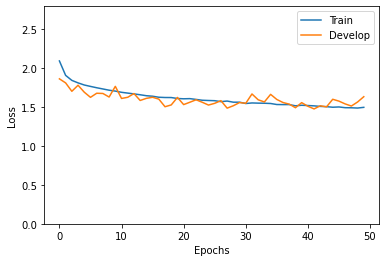

In [77]:
"your code here"
plot_history(history)

# Save Your Model

In [78]:
cifar_model.save("my_cifar_model")

INFO:tensorflow:Assets written to: my_cifar_model/assets


# Load Your Model

In [79]:
loaded_model=tf.keras.models.load_model("my_cifar_model")

# Use your Model

Will try a quick example with a photo. You can use mine or upload your own to Talapas

* We need to open our photos and resize/reshape them for our model
* We need rescale them to match training

In [80]:
import PIL

(3024, 4032, 3)


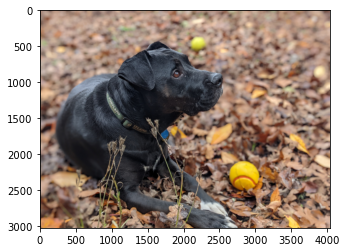

In [81]:
dog_image=PIL.Image.open('/gpfs/projects/bgmp/shared/2019_ML_workshop/datasets/Test_Photos/dog.jpg')
dog_array=np.asarray(dog_image)
print(dog_array.shape)
plt.imshow(dog_array)

# Crop and Resize

Cropped Size (3024, 3024)
Resized Image <PIL.Image.Image image mode=RGB size=32x32 at 0x2AAB327426A0>


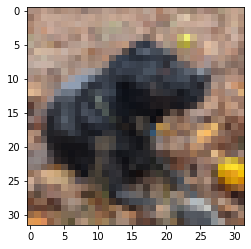

In [82]:
length,width=dog_image.size
min_length=min([length,width])

#Crop a box with coordinates (left,top,right,bottom)  0,0 is the upper left corner
new_image=dog_image.crop((0,0,min_length,min_length))
print("Cropped Size",new_image.size)
new_image=new_image.resize((32,32))
print("Resized Image",new_image)

new_array=np.asarray(new_image)
plt.imshow(new_array)


# Put it together into a function

In [83]:
def process_image(input_file):
    image=PIL.Image.open(input_file)
    length,width=dog_image.size
    min_length=min([length,width])

    #Crop a box with coordinates (left,top,right,bottom)  0,0 is the upper left corner
    new_image=image.crop((0,0,min_length,min_length))
    new_image=new_image.resize((32,32))
    new_array=np.asarray(new_image)
    new_array=new_array/255
    new_array=np.expand_dims(new_array,axis=0)
    return new_array
    

First Image Shape (1, 32, 32, 3)
Data Set Shape (3, 32, 32, 3)
Dataset max,min: 1.0 0.0


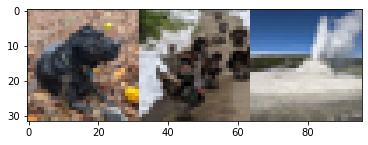

In [84]:
my_images=[
'/gpfs/projects/bgmp/shared/2019_ML_workshop/datasets/Test_Photos/dog.jpg',
    '/gpfs/projects/bgmp/shared/2019_ML_workshop/datasets/Test_Photos/bird.jpg',
    '/gpfs/projects/bgmp/shared/2019_ML_workshop/datasets/Test_Photos/unknown.jpg'
]

data=[process_image(f) for f in my_images]
print("First Image Shape",data[0].shape)
data=np.concatenate(data,axis=0)
print("Data Set Shape",data.shape)

plt.imshow(np.hstack(data))
print("Dataset max,min:",np.max(data),np.min(data))

In [85]:
photo_pred=cifar_model.predict(data)

#

photo_last_space=cifar_model



Image 0  predicted as: cat 30 %  Second place: dog 26 %


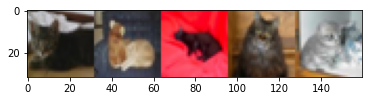

Image 1  predicted as: cat 39 %  Second place: dog 20 %


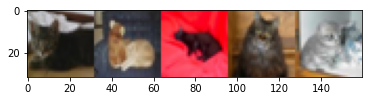

Image 2  predicted as: airplane 59 %  Second place: ship 25 %


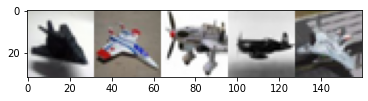

In [86]:
cifar_category=['airplane',
                'automobile', 
                'bird',
                'cat', 
                'deer', 
                'dog',
                'frog', 
                'horse', 
                'ship', 
                'truck']

for i,pred in enumerate(photo_pred):
    sort_list=np.argsort(pred)
    first=sort_list[-1]
    second=sort_list[-2]
    print("Image",i," predicted as:",cifar_category[first],round(pred[first]*100),"%"," Second place:",cifar_category[second],round(pred[second]*100),"%" )
    _train_data=cfX_train[cfY_train[:,0]==first][0:5]
    plt.imshow(np.hstack(_train_data))
    plt.show()


# How were your results?

Mine were somewhat disappointing; this is one reason among many why convolutional neural networks, which we will see next time are almost always used in image analysis tasks.

In [87]:
"Some Investigation"
train_int_vec=[]
photo_int_vec=[]
"Get the intermediate values for all the layers in the neural network"
for i,l in enumerate(cifar_model.layers[1:]):
    new_model=tf.keras.models.Model(input_layer,l.output)
    train_int_vec.append(new_model.predict(cfX_train))
    photo_int_vec.append(new_model.predict(data))


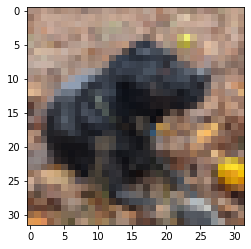

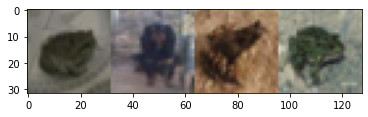

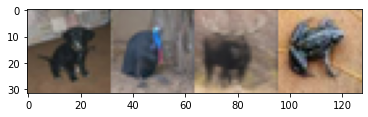

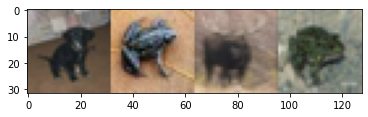

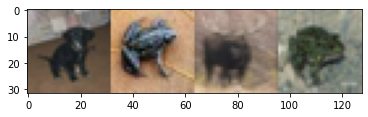

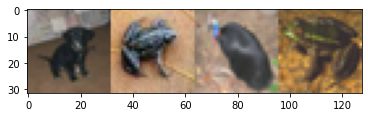

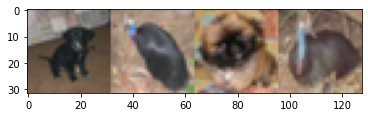

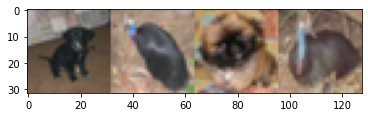

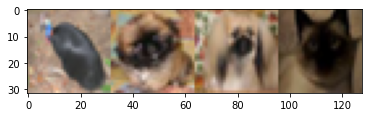

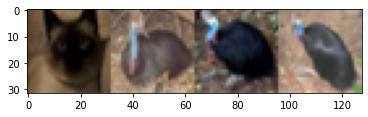

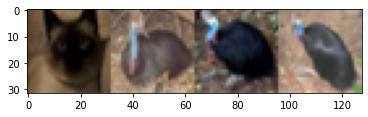

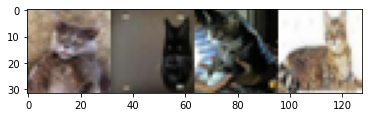

Close Data Labels ['cat', 'cat', 'cat', 'cat']
Close Data Predictions ['cat', 'cat', 'cat', 'cat']


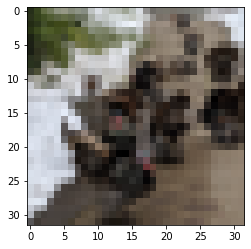

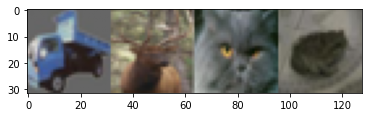

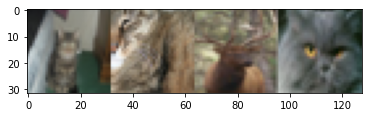

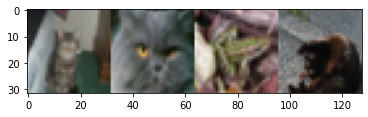

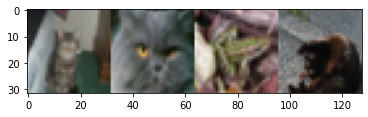

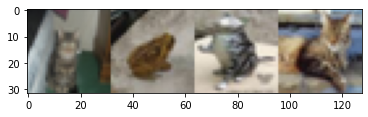

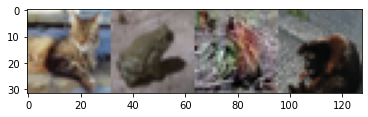

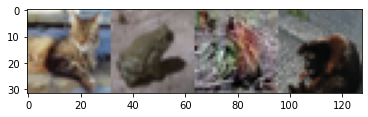

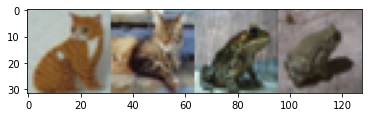

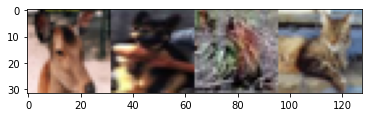

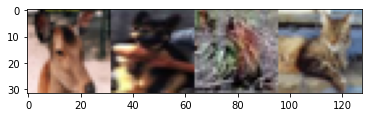

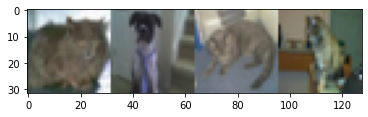

Close Data Labels ['cat', 'dog', 'cat', 'cat']
Close Data Predictions ['cat', 'cat', 'cat', 'cat']


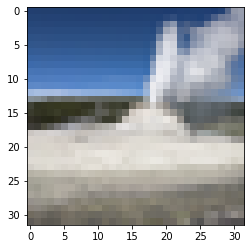

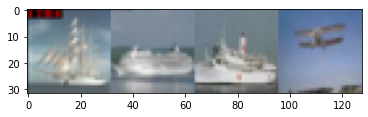

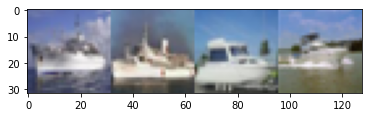

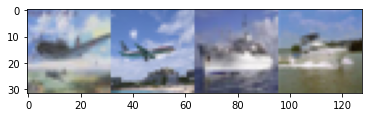

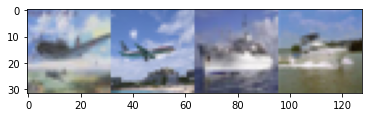

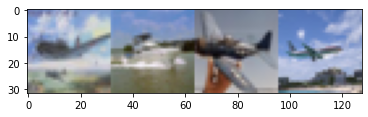

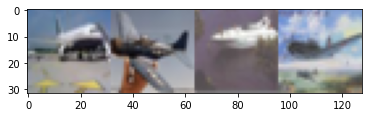

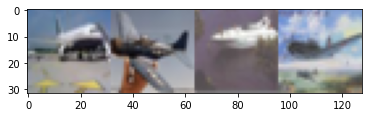

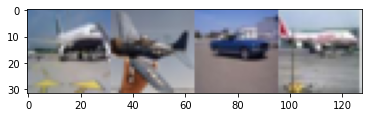

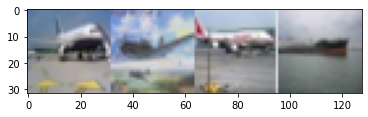

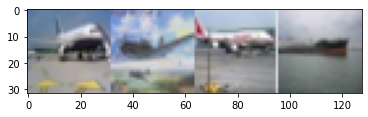

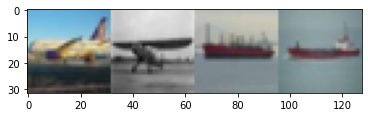

Close Data Labels ['airplane', 'airplane', 'ship', 'ship']
Close Data Predictions ['airplane', 'airplane', 'airplane', 'airplane']


In [88]:
"Plot the most similar by layer in the training dataset"

for i,d in enumerate(data):
    plt.imshow(d)
    plt.show()
    for layer_n,train_data in enumerate(train_int_vec):
        close_train_points=np.argsort([np.linalg.norm(photo_int_vec[layer_n][i]-t) for t in train_data])[0:4]
        
        plt.imshow(np.hstack(cfX_train[close_train_points]))
        plt.show()
    print("Close Data Labels", [cifar_category[i[0]] for i in cfY_train[close_train_points]])
    print("Close Data Predictions", [cifar_category[i] for i in np.argmax(train_data[close_train_points],axis=-1)])
